In [121]:
import pandas as pd
from datetime import date, datetime

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',100)

# For Linear Regression and Plots
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
#-rwxrwxrwx 1 ubuntu ubuntu 61M Jun 21 21:35 ./df/processed/retail_df_clean.csv
df = pd.read_csv(r'../processed/retail_data_clean.csv')
# Select columns I need
df = df[['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products']]
df.shape


(295617, 25)

In [123]:
df.columns


Index(['Transaction_ID', 'Customer_ID', 'City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount',
       'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [124]:
df.dtypes


Transaction_ID      float64
Customer_ID         float64
City                 object
State                object
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [125]:
df['Transaction_ID'] = df['Transaction_ID'].astype(int)
df['Customer_ID'] = df['Customer_ID'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Total_Purchases'] = df['Total_Purchases'].astype(int)
df['Ratings'] = df['Ratings'].astype(int)
df.dtypes


Transaction_ID        int64
Customer_ID           int64
City                 object
State                object
Country              object
Age                   int64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                  int64
Month                object
Time                 object
Total_Purchases       int64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings               int64
products             object
dtype: object

In [126]:
df.head()


,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,2023-12-31,2023,December,8:42:04,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,2023-04-26,2023,April,4:06:29,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment
3,7232460,62101,Edmonton,Ontario,Canada,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife
4,4983775,27901,Bristol,England,UK,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies


In [127]:
#Filtering out float types
df.select_dtypes(include=['float']).columns


Index(['Amount', 'Total_Amount'], dtype='object')

In [128]:
df['Ratings'].unique


<bound method Series.unique of 0         5
1         4
2         2
3         4
4         1
         ..
295612    1
295613    5
295614    2
295615    4
295616    2
Name: Ratings, Length: 295617, dtype: int64>

In [129]:
df['Age'].sort_values().unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [130]:
#Overall transaction value by age (bin age for customer segments)

# Bin the age variable
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Encoding categorical variables
label_encoders = {}
for column in ['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 
               'Month', 'Product_Category', 'Product_Brand', 'Product_Type', 
               'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products', 'Age_Group']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Convert Date and Time to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Extract features from Date
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Drop Date and Time columns
df = df.drop(['Date', 'Time'], axis=1)

# Define the target variable and features
X = df.drop(['Total_Amount', 'Transaction_ID', 'Customer_ID', 'Age'], axis=1)

#X = df.drop(['Total_Amount', 'Amount', 'Transaction_ID', 'Customer_ID'], axis=1)
y = df['Total_Amount']
#y = df['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.8709274502671402
Mean Squared Error: 164867.67995469391


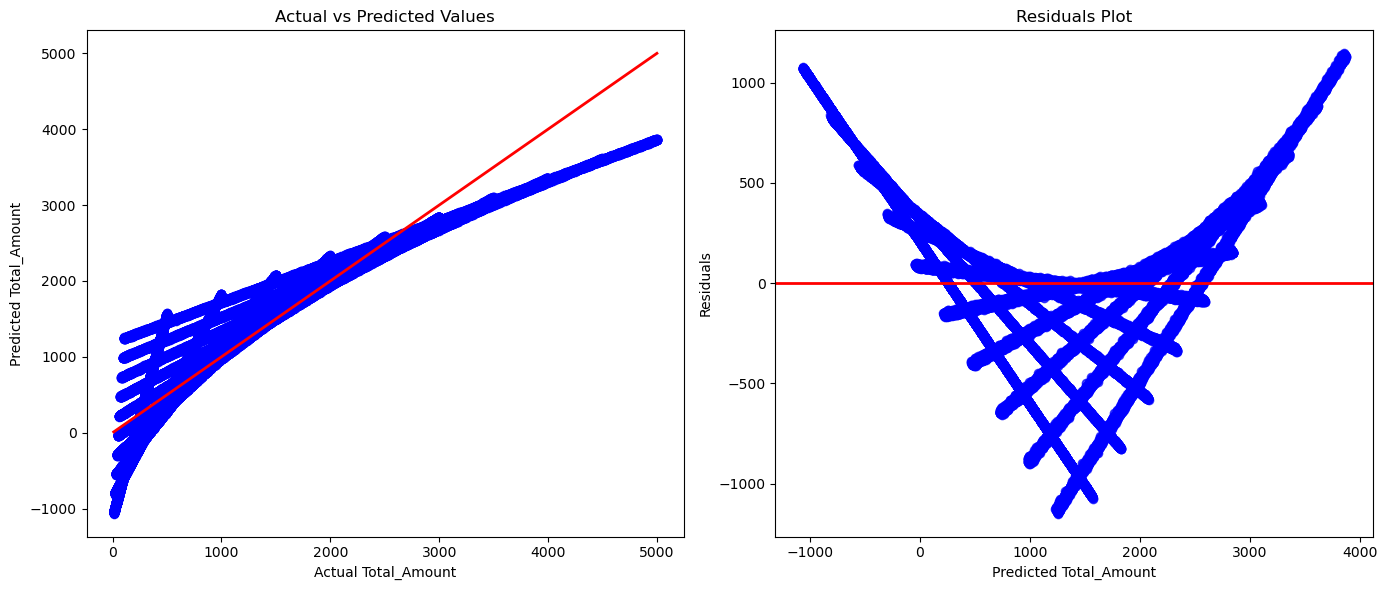

In [131]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Total_Amount')
plt.ylabel('Predicted Total_Amount')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Plot Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.xlabel('Predicted Total_Amount')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linewidth=2)

plt.tight_layout()
plt.show()
